## Homework #3. Crowdsourcing tools review
#### Author: Anna Hunaza
#### Total time spent on h/w (in minutes): `<3500>`

Topics which I'm going to work on:
1. Total activity during the week: number of all messages for each day of the week
2. Distribution between send & received messages during the week
3. Activity in different seasons
4. Which stickers are used the most?
5. My activity during the day
6. Types of messages I send
7. How many new chats do I have since becoming a student++
8. Average length of message in TOP-10 biggest groups
9. Distributin between males/females in 4 chats with different members
10. Girls'/boys' monthly activity in my group chat
11. Activity in our chat during the day
12. Most active boys in our chat
13. Most active girls in our chat
14. Tone of messages I send
15. Frequensy of different length text messages I send
16. Frequensy of different length text messages I send (super long)
17. Distribution between gender I communicate with

In [143]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import calendar
import matplotlib.dates as mdates

In [144]:
DIALOGS_MERGED_DATA_PATH = "d:/Users/Anna/Desktop/CSS/data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "d:/Users/Anna/Desktop/CSS/data/merged_data/dialogs_users_all.csv"
FEMALE_ENG_NAMES = "d:/Users/Anna/Desktop/CSS/female_ru_ukr_trans_names.csv"
FEMALE_RU_NAMES = "d:/Users/Anna/Desktop/CSS/female_russian_names.csv"
FEMALE_UA_NAMES = "d:/Users/Anna/Desktop/CSS/female_ukrainian_names.csv"
MALE_ENG_NAMES = "d:/Users/Anna/Desktop/CSS/male_ru_ukr_trans_names.csv"
MALE_RU_NAMES = "d:/Users/Anna/Desktop/CSS/male_russian_names.csv"
MALE_UA_NAMES = "d:/Users/Anna/Desktop/CSS/male_ukrainian_names.csv"

In [145]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, low_memory=False)
df_meta_ = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH, low_memory=False)
female_eng_names = pd.read_csv(FEMALE_ENG_NAMES)
female_ru_names = pd.read_csv(FEMALE_RU_NAMES)
female_ua_names = pd.read_csv(FEMALE_UA_NAMES)
male_eng_names = pd.read_csv(MALE_ENG_NAMES)
male_ru_names = pd.read_csv(MALE_RU_NAMES)
male_ua_names = pd.read_csv(MALE_UA_NAMES)

## Task

In [146]:
df.tail(1)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
319542,100891,2021-06-29 08:19:47+00:00,PeerUser(user_id=504389777),981873825,NaN,/start,text,NaN,981873825


## №1 Total activity during the week: number of all messages for each day of week

In [147]:
df["day_of_week"] = pd.to_datetime(df["date"]).dt.day_name()#Monday, Tuesday...
df["day_number"] = pd.to_datetime(df["date"]).dt.dayofweek# 0, 1, ..., 6
df["day"] = pd.to_datetime(df["date"]).dt.date#only day (without time)
#df["season"] = df.apply(lambda row: get_season(str(row["day"])), axis=1)
df.tail(1)


,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id,day_of_week,day_number,day
319542,100891,2021-06-29 08:19:47+00:00,PeerUser(user_id=504389777),981873825,NaN,/start,text,NaN,981873825,Tuesday,1,2021-06-29


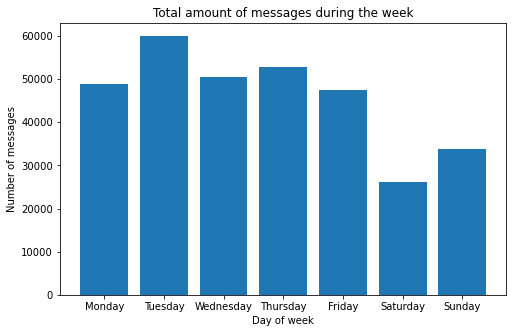

In [148]:
days = df.groupby(["day_of_week", "day_number"])["day_of_week"].count().reset_index(name="count")
days.sort_values(by=["day_number"], inplace=True)

plt.figure(figsize=(8,5))
plt.bar(days["day_of_week"], days["count"])
plt.title("Total amount of messages during the week")#, fontsize=14)
plt.xlabel("Day of week")
plt.ylabel("Number of messages")
plt.show()


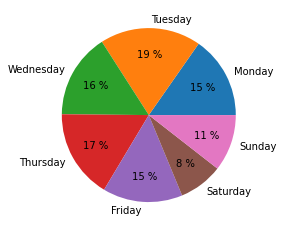

In [149]:
plt.pie(days["count"], labels=days["day_of_week"], autopct='%.f %%', pctdistance=0.7)
plt.show()

In [150]:
fig = px.line_polar(days, r='count', theta='day_of_week', line_close=True)
fig.update_traces(line_color='mediumpurple', fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
)
fig.show()

## №2  Distribution between send & received messages during the week

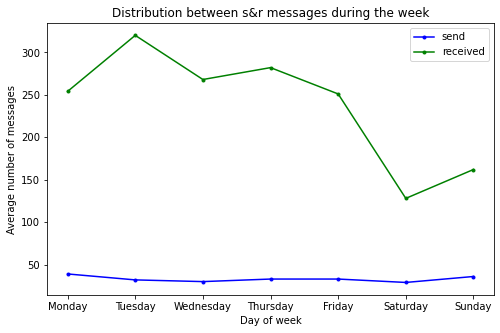

In [151]:
send_df = df[(df["from_id"] == "PeerUser(user_id=504389777)") & (df["date"] > '2019-01-01')]
send_df = send_df.groupby(["day", "day_of_week", "day_number"])["id"].count().reset_index(name="send messages")
send_df = send_df.groupby(["day_of_week", "day_number"])["send messages"].mean().round().reset_index(name="average send messages")

received_df = df[(df["from_id"] != "PeerUser(user_id=504389777)") & (df["date"] > '2019-01-01')]
received_df = received_df.groupby(["day", "day_of_week", "day_number"])["id"].count().reset_index(name="received messages")
received_df = received_df.groupby(["day_of_week", "day_number"])["received messages"].mean().round().reset_index(name="average received messages")

new_df = pd.merge(send_df, received_df, how = "outer", on = ["day_of_week", "day_number"])
new_df.sort_values(by=["day_number"], inplace = True)
new_df

plt.figure(figsize=(8,5))
plt.plot(new_df["day_of_week"], new_df["average send messages"], 'b.-')
plt.plot(new_df["day_of_week"], new_df["average received messages"], 'g.-')
plt.title("Distribution between s&r messages during the week")
plt.legend(['send', 'received'])
plt.xlabel("Day of week")
plt.ylabel("Average number of messages")
plt.show()

## №3 My activity in different seasons

In [152]:
def get_season(date):
    month = int(date.split("-")[1])
    if month in range(3,6):
        return 'spring'
    if month in range(6, 9):
        return 'summer'
    if month in range(9, 12):
        return 'autumn'
    return 'winter'

In [153]:
ssend = df[(df["from_id"] == "PeerUser(user_id=504389777)") & (df["date"] > '2019-01-01')].copy()
ssend = ssend.groupby(["day"])["id"].count().reset_index(name="send messages")
ssend["season"] = ssend.apply(lambda row: get_season(str(row["day"])), axis=1)
ssend.pop("day")
ssend = ssend.groupby("season")["send messages"].mean().round().reset_index(name="send")
ssend

sreceived = df[(df["from_id"] != "PeerUser(user_id=504389777)") & (df["date"] > '2019-01-01')].copy()
sreceived = sreceived.groupby(["day"])["id"].count().reset_index(name="received messages")
sreceived["season"] = sreceived.apply(lambda row: get_season(str(row["day"])), axis=1)
sreceived.pop("day")
sreceived = sreceived.groupby("season")["received messages"].mean().round().reset_index(name="received")
sreceived

season_df = pd.merge(ssend, sreceived, how="inner", on="season")

#sort by season
df_mapping = pd.DataFrame({'season': ["winter", "spring", "summer", "autumn"]})
sort_mapping = df_mapping.reset_index().set_index('season')
season_df['num'] = season_df['season'].map(sort_mapping['index'])
season_df = season_df.sort_values('num')
season_df

,season,send,received,num
3,winter,22.0,229.0,0
1,spring,50.0,239.0,1
2,summer,48.0,171.0,2
0,autumn,17.0,315.0,3


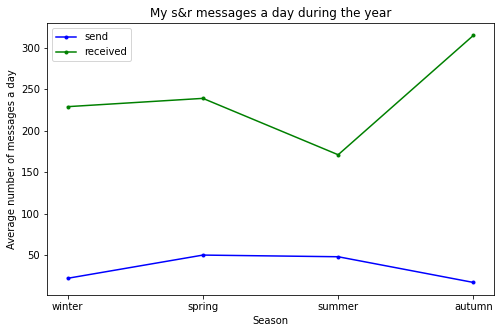

In [154]:
plt.figure(figsize=(8,5))
plt.plot(season_df["season"], season_df["send"], 'b.-')
plt.plot(season_df["season"], season_df["received"], 'g.-')
plt.title("My s&r messages a day during the year")
plt.legend(['send', 'received'])
plt.xlabel("Season")
plt.ylabel("Average number of messages a day")
plt.show()

## №3.1 My group activity in different seasons

In [155]:
gsend = df[df["to_id"] == "PeerChannel(channel_id=1260680685)"].copy()
gsend = gsend.groupby(["day"])["id"].count().reset_index(name="send messages")
gsend["season"] = gsend.apply(lambda row: get_season(str(row["day"])), axis=1)
gsend.pop("day")
gsend = gsend.groupby("season")["send messages"].mean().round().reset_index(name="send")
gsend

#sort by season
df_mapping = pd.DataFrame({'season': ["winter", "spring", "summer", "autumn"]})
sort_mapping = df_mapping.reset_index().set_index('season')
gsend['num'] = gsend['season'].map(sort_mapping['index'])
gsend = gsend.sort_values('num')
gsend

,season,send,num
3,winter,225.0,0
1,spring,96.0,1
2,summer,32.0,2
0,autumn,400.0,3


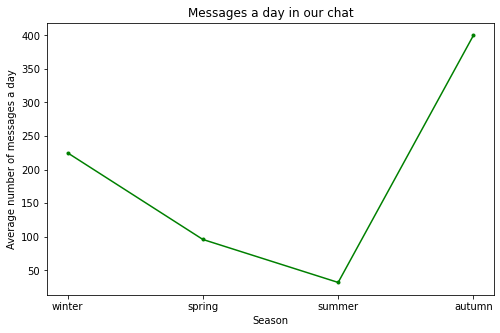

In [156]:
plt.figure(figsize=(8,5))
plt.plot(gsend["season"], gsend["send"], 'g.-')
plt.title("Messages a day in our chat")
plt.xlabel("Season")
plt.ylabel("Average number of messages a day")
plt.show()

## №4 Which stickers are used the most

In [158]:
sticker_df = df[df["type"] == "sticker"].groupby(["message"])["message"].count().reset_index(name="count")
sticker_df = sticker_df.sort_values(by=['count'], ascending=False)
sticker_df = sticker_df[0:6]

fig = px.pie(sticker_df, values='count', names='message', title='Distribution between the most used emojis in all dialogs')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()


## №5 My activity during the day

In [15]:
me = df[df["from_id"] == "PeerUser(user_id=504389777)"].copy()
me = me.groupby("date")["id"].count().reset_index(name="count")
me["hour"] = pd.to_datetime(me['date']).apply(lambda x: x.hour)
me["hour"] = me["hour"].apply(lambda x: (x+3)%24)#the time in df was not true (3  hours earlier)
me["date"] = me["date"] = pd.to_datetime(df["date"]).dt.date

my_hour_activity = me.groupby(["date", "hour"])["count"].sum().reset_index(name="count")
my_hour_activity = my_hour_activity.groupby("hour")["count"].sum().round().reset_index(name="count")

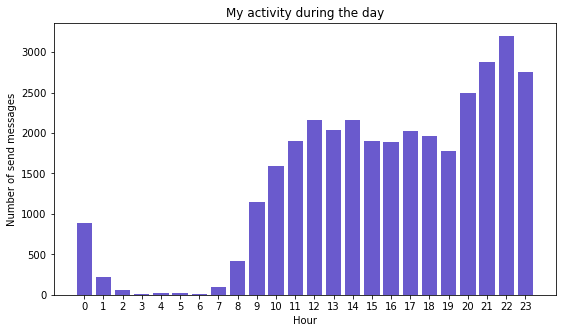

In [119]:
plt.figure(figsize=(9,5))
plt.bar(my_hour_activity["hour"], my_hour_activity["count"], color="slateblue")
plt.title("My activity during the day")
plt.xticks(my_hour_activity["hour"][::1])
#plt.yticks([0, 2000, 4000, 6000, 8000, 10000])
#plt.grid()
plt.xlabel("Hour")
plt.ylabel("Number of send messages")
plt.show()

## №6 Types of messages I send

In [17]:
my_messages = df[df["from_id"] == "PeerUser(user_id=504389777)"].copy()
my_messages = my_messages.groupby("type")["id"].count().reset_index(name="count")
my_messages = my_messages.sort_values("count", ascending = False)

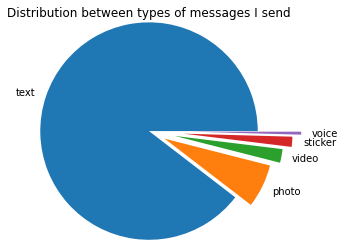

In [18]:
plt.pie(my_messages["count"], labels=my_messages["type"], explode=(0,.2,.3,.4,.5), radius=1.25)
plt.title("Distribution between types of messages I send")
plt.show()

## Editing df_meta
(spliting "users" into separate columns to easily access user's name etc.)

In [125]:
#df_meta = df_meta[df_meta["dialog_id"] == -1001260680685].copy()
#df_meta = df_meta[df_meta["dialog_id"] < 0].copy()
df_meta = df_meta_.copy()
df_meta["users"] = df_meta["users"].str.replace("\'", "")
df_meta[["user_id", "first_name", "last_name", "user_name", "phone", "-"]] = df_meta["users"].str.split(", ", expand=True)

df_meta["user_id"] = df_meta["user_id"].str.replace('{user_id: ','', regex=True)
df_meta["first_name"] = df_meta["first_name"].str.replace('first_name: ','', regex=True)
df_meta["last_name"] = df_meta["last_name"].str.replace('last_name: ','', regex=True)
df_meta["user_name"] = df_meta["user_name"].str.replace('username: ','', regex=True)
df_meta["phone"] = df_meta["phone"].str.replace('phone: ','', regex=True)
df_meta["phone"] = df_meta["phone"].str.replace('}','', regex=True)

df_meta.pop("users")
df_meta.pop("-")

0       None
1       None
2       None
3       None
4       None
        ... 
1655    None
1656    None
1657    None
1658    None
1659    None
Name: -, Length: 1660, dtype: object

## №7 How many new chats I have since becoming a student

In [128]:
#df with unique dialogs and its start date
new_chats = df.groupby("dialog_id")["day"].min().reset_index(name="start date")

short_df_meta = df_meta.groupby("dialog_id")["name"].min()

new = pd.merge(new_chats, short_df_meta, how = 'inner', on = 'dialog_id')
new.sort_values(by=["start date"], inplace = True)
new = new.reset_index()
new.pop("index")

0       43
1       67
2      109
3       98
4       50
      ... 
132      0
133     22
134     25
135    135
136     24
Name: index, Length: 137, dtype: int64

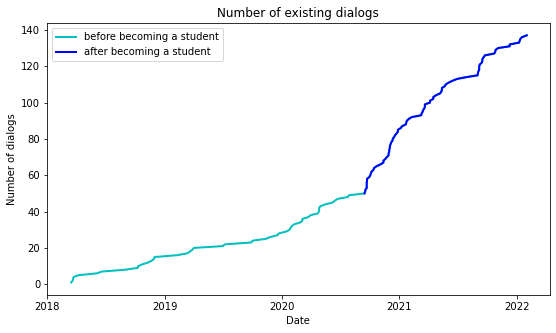

In [129]:
before = new.copy()
after = new[pd.to_datetime(new["start date"]) >= '2020-09-10']

formatter = mdates.DateFormatter("%Y") ### formatter of the date
locator = mdates.YearLocator() ### where to put the labels

fig = plt.figure(figsize=(9, 5))
ax = plt.gca()
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

plt.plot(before["start date"], before.index.values+1, "c", linewidth=2)
plt.plot(after["start date"], after.index.values+1, "b", linewidth=2)

plt.xticks(['2018','2019', '2020', '2021', '2022'])
plt.title("Number of existing dialogs")
plt.xlabel("Date")
plt.ylabel("Number of dialogs")
plt.legend(['before becoming a student', 'after becoming a student'])
plt.show()

## №8 Average length of message in TOP-10 biggest groups

In [22]:
#biggest groups
b_group = df_meta[df_meta["type"] == "Group"]
b_group = b_group.groupby("dialog_id")["dialog_id"].count().reset_index(name="size")
b_group = b_group.sort_values(by=["size"], ascending = False)
b_group = b_group.head(10)

In [82]:
b_messages = df[df["dialog_id"].isin(b_group["dialog_id"].tolist())].copy()
b_messages["number of words"] = b_messages["message"].str.count(' ').add(1)
b_messages =b_messages.groupby("dialog_id")["number of words"].mean().round().reset_index(name="number of words")
b_messages = b_messages.sort_values("number of words", ascending = False)
b_messages["dialog_id"] = b_messages["dialog_id"].replace({-1001386844704: 'G1',
                                                           -1001255031243: 'G2',
                                                           -1001787503050: 'G3',
                                                           -1001423156656: 'G4',
                                                           -1001393785264: 'G5',
                                                           -593686724: 'G6',
                                                           -1001174112602: 'G7',                         
                                                           -330259975: 'G8',
                                                           -1001477659362: 'G9',                         
                                                           -1001260680685: 'G10',})

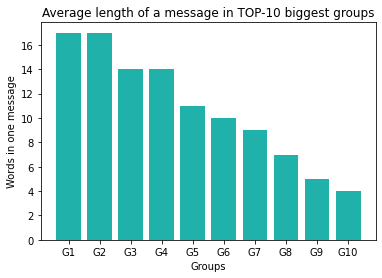

In [83]:
plt.bar(b_messages["dialog_id"], b_messages["number of words"], color="lightseagreen")
plt.title("Average length of a message in TOP-10 biggest groups")
plt.xlabel("Groups")
plt.ylabel("Words in one message")
plt.show()

## №9 Distribution between genders in 4 chats with different members

In [25]:
def get_gender(user_name):
    if female_eng_names[female_eng_names["name"] == user_name]["name"].count() > 0:
        return "female"
    elif female_ru_names[female_ru_names["name"] == user_name]["name"].count() > 0:
        return "female"
    elif female_ua_names[female_ua_names["name"] == user_name]["name"].count() > 0:
        return "female"
    elif male_eng_names[male_eng_names["name"] == user_name]["name"].count() > 0:
        return "male"
    elif male_ru_names[male_ru_names["name"] == user_name]["name"].count() > 0:
        return "male"
    elif male_ua_names[male_ua_names["name"] == user_name]["name"].count() > 0:
        return "male"
    if bool(random.getrandbits(1)) == True:
        return "female"
    return "male"

In [94]:
#chats = plus "gender" column to df_meta
chats = df_meta[df_meta["name"].isin(["Примати20х2","МатМислення 21-22", "Основи Підприємництва", "Основи теорії груп"])].copy() 
chats["gender"] = chats.apply(lambda row : get_gender(row["first_name"]), axis = 1)

b = chats.groupby(["name","gender"])["gender"].count().reset_index(name="count")
female = b[b["gender"]=="female"]
female.pop("gender")
male = b[b["gender"]=="male"]
male.pop("gender")

gender = pd.merge(male, female, how = 'inner', on = 'name')
gender.columns = ["group", "male", "female"]
gender

,group,male,female
0,МатМислення 21-22,8,25
1,Основи Підприємництва,7,24
2,Основи теорії груп,12,10
3,Примати20х2,23,22


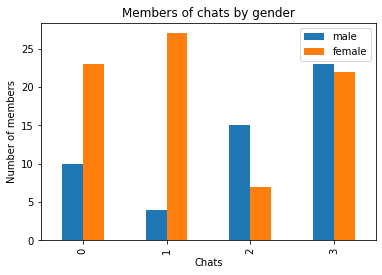

In [27]:
gender.plot(kind="bar")
plt.title("Members of chats by gender")
plt.xlabel("Chats")
plt.ylabel("Number of members")
plt.show()

In [28]:
fig = px.histogram(b, x="name", y="count", color="gender",
            title="Members of chats by gender",
            width=700, height=400,
            labels={ # replaces default labels by column name
                "gender": "Gender",  "name": "Groups", "count": "members"},
            category_orders={ # replaces default order by column name
                "name": ["Примати20х2","МатМислення 21-22", "Основи Підприємництва", "Основи теорії груп"],
                "gender": ["male", "female"]},
            color_discrete_map={ # replaces default color mapping by value
                "male": "RebeccaPurple", "female": "MediumPurple"}
            )
fig.show()

## №10 Girls'/boys' monthly activity in my group chat

In [130]:
#messages from our chat (from df) with modified "user_id" column
group_messages = df[df["dialog_id"] == -1001260680685].copy()
group_messages["from_id"] = group_messages["from_id"].str.replace('PeerUser', '', regex=True)
group_messages["from_id"] = group_messages["from_id"].str.replace('user_id=','', regex=True)
group_messages["from_id"] = group_messages["from_id"].str.replace('(','', regex=True)
group_messages["from_id"] = group_messages["from_id"].str.replace(')','', regex=True)
group_messages = group_messages.rename({"from_id": "user_id"}, axis='columns')

#m = m.drop(columns =["to_id", "fwd_from", "dialog_id", "day_of_week", "day_number", "duration"])

In [30]:
#members of our chat (from df_meta) with gender
group_members = df_meta[df_meta["name"]=="Примати20х2"].copy()
group_members["gender"] = chats.apply(lambda row : get_gender(row["first_name"]), axis = 1)

#merging df+df_meta = messages+members of our chat
group = pd.merge(group_messages, group_members, how="inner", on="user_id")

#group by year, month for male and female separetely, then merge
n = group.copy()
n['year'] = pd.to_datetime(n['date']).apply(lambda x: x.year)#x.strftime
n['month'] = pd.to_datetime(n['date']).apply(lambda x: x.month)#x.strftime

nmale = n[n["gender"]=="male"]
nmale = nmale.groupby(["year", "month"])["gender"].count().reset_index(name="male")
nmale = nmale.groupby("month")["male"].mean().round().reset_index(name="male")

nfemale = n[n["gender"]=="female"]
nfemale = nfemale.groupby(["year", "month"])["gender"].count().reset_index(name="female")
nfemale = nfemale.groupby("month")["female"].mean().round().reset_index(name="female")

ngender = pd.merge(nmale, nfemale, how="inner", on="month")
ngender['month_name'] = ngender['month'].apply(lambda x: calendar.month_name[x])
ngender

,month,male,female,month_name
0,1,3944.0,634.0,January
1,2,1655.0,546.0,February
2,3,3190.0,1233.0,March
3,4,1625.0,642.0,April
4,5,747.0,239.0,May
5,6,628.0,218.0,June
6,7,195.0,47.0,July
7,8,135.0,54.0,August
8,9,1619.0,729.0,September
9,10,10587.0,1998.0,October


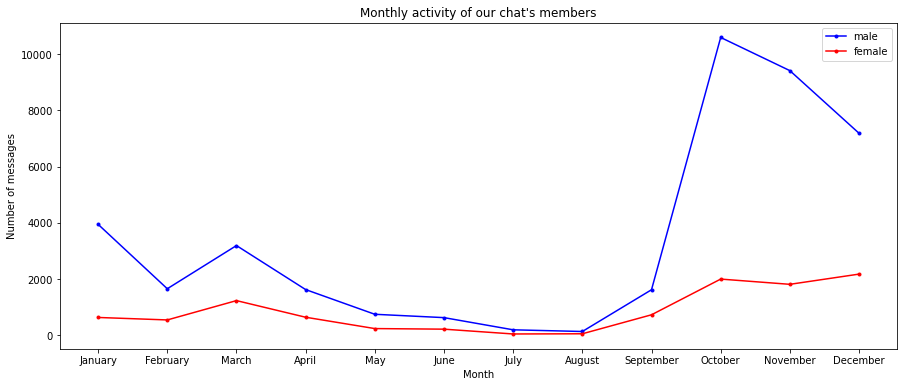

In [31]:
plt.figure(figsize=(15,6))
plt.plot(ngender["month_name"], ngender["male"], 'b.-')
plt.plot(ngender["month_name"], ngender["female"], 'r.-')
plt.title("Monthly activity of our chat's members")
plt.xticks(ngender["month_name"])
plt.legend(['male', 'female'])
plt.xlabel("Month")
plt.ylabel("Number of messages")
plt.show()

## №11 Activity in our chat during the day

In [89]:
messages = df[df["dialog_id"] == -1001260680685].copy()
messages = messages.groupby("date")["id"].count().reset_index(name="count")
messages["hour"] = pd.to_datetime(messages['date']).apply(lambda x: x.hour)
messages["hour"] = messages["hour"].apply(lambda x: (x+3)%24)#the time in df was not true (3  hours earlier)
messages["date"] = messages["date"] = pd.to_datetime(df["date"]).dt.date

hour_activity = messages.groupby(["date", "hour"])["count"].sum().reset_index(name="count")
hour_activity = hour_activity.groupby("hour")["count"].sum().reset_index(name="count")

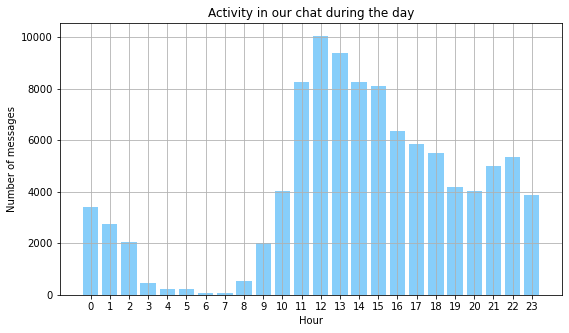

In [90]:
fig,ax = plt.subplots(figsize=(9,5))
plt.bar(hour_activity["hour"], hour_activity["count"], color="lightskyblue")
plt.title("Activity in our chat during the day")
plt.xticks(hour_activity["hour"][::1])
plt.xlabel("Hour")
plt.ylabel("Number of messages")
plt.grid()
plt.show()

## №12 Most active boys in our chat

In [34]:
#group our chat's users by id
chat = group_messages.groupby("user_id")["user_id"].count().reset_index(name="count").copy()
chat = chat.sort_values("count", ascending=False)
#all (our chat) users from df_meta
names = df_meta[(df_meta["user_id"].isin(chat["user_id"].tolist()))
               & (df_meta["name"]=="Примати20х2")].copy()
names["gender"] = names.apply(lambda row : get_gender(row["first_name"]), axis = 1)

In [35]:
#only boys
boys = names[names["gender"]=="male"].copy()
active_boys = pd.merge(chat, boys, how="inner", on="user_id")
active_boys = active_boys.head(5)

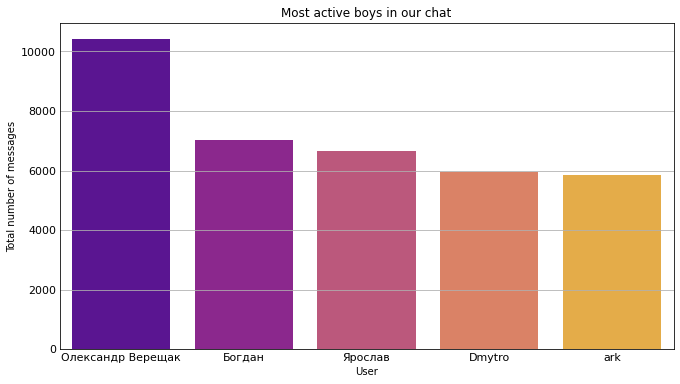

In [76]:
fig,ax = plt.subplots(figsize=(11,6))
ax.grid()
sns.barplot(x="first_name",y="count",data=active_boys,ci=95,ax=ax, palette = "plasma")
ax.set_title("Most active boys in our chat")
ax.set_xlabel("User")
ax.set_ylabel("Total number of messages")
#ax.grid()
ax.tick_params(labelsize=11,length=0)
#plt.box(False)

## №13 Most active girls in our chat

In [37]:
#only girls
girls = names[names["gender"]=="female"]
active_girls = pd.merge(chat, girls, how="inner", on="user_id")
active_girls = active_girls.head(5)

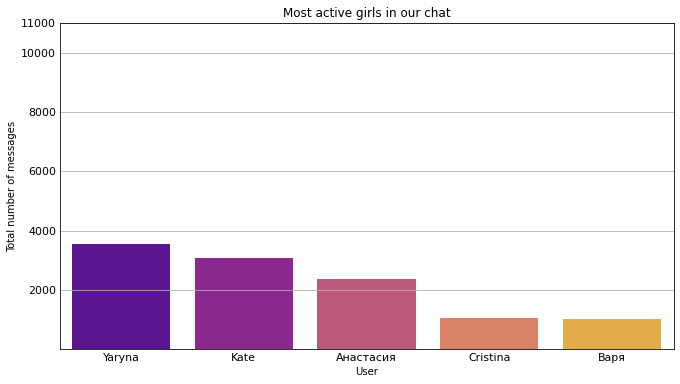

In [78]:
fig,ax = plt.subplots(figsize=(11,6))
ax.grid()
sns.barplot(x="first_name",y="count",data=active_girls,ci=95,ax=ax, palette = "plasma")
ax.set_title("Most active girls in our chat")
ax.set_xlabel("User")
ax.set_ylabel("Total number of messages")
ax.set_yticks([2000,4000, 6000, 8000, 10000, 11000])
ax.tick_params(labelsize=11,length=0)

#plt.box(False)

## №14 Tone of messages I send

In [39]:
my_message = df[df["from_id"] == "PeerUser(user_id=504389777)"].copy()

my_message["number of words"] = my_message["message"].str.count(' ').add(1)
my_message["number of ')'"] = my_message["message"].str.count('\)')
my_message["number of '?'"] = my_message["message"].str.count('\?')
my_message["number of '!'"] = my_message["message"].str.count('\!')

In [40]:
k = int(my_message[my_message["number of ')'"] > 0].groupby("from_id")["from_id"].count())
l = int(my_message[my_message["number of '!'"] > 0].groupby("from_id")["from_id"].count())
p = int(my_message[my_message["number of '?'"] > 0].groupby("from_id")["from_id"].count())
t = len(my_message[my_message["type"]=="text"])-l-k-p
d = {"Sign": [".", "?", ")", "!"],
    "Count": [t, p, k, l]}
d = pd.DataFrame(data=d)

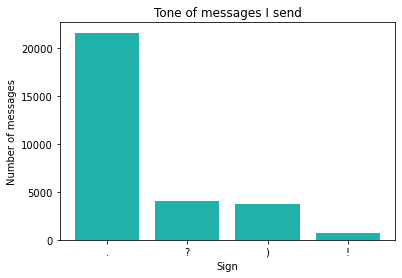

In [41]:
plt.bar(d["Sign"], d["Count"], color="lightseagreen")
plt.title("Tone of messages I send")
plt.xlabel("Sign")
plt.ylabel("Number of messages")
plt.show()

## №15 Frequensy of different length text messages I send

In [132]:
text = my_message[my_message["type"]=="text"]
text = text.groupby("number of words")["number of words"].count().reset_index(name="count")
text = text.sort_values("count", ascending=False)
text1 = text.head(15)

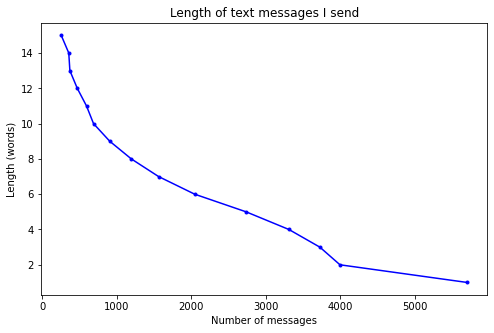

In [43]:
plt.figure(figsize=(8,5))
plt.plot(text1["count"], text1["number of words"], "b.-")
plt.title("Length of text messages I send")
plt.xlabel("Number of messages")
plt.ylabel("Length (words)")
plt.show()

## №16 Frequensy of different length text messages I send (super long)

In [44]:
text2 = text.sort_values("number of words", ascending=False)
text2 = text2.head(6)

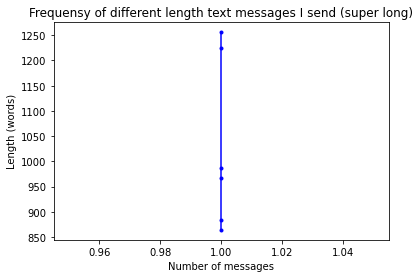

In [134]:
plt.plot(text2["count"], text2["number of words"], 'b.-')
plt.title("Frequensy of different length text messages I send (super long)")
plt.xlabel("Number of messages")
plt.ylabel("Length (words)")
plt.show()

## №17 Distribution between gender I communicate with

In [46]:
my = df[(df["from_id"] == "PeerUser(user_id=504389777)")].copy()
my = my.rename({"to_id": "user_id"}, axis='columns')

ggender = df_meta.copy()
ggender["gender"] = chats.apply(lambda row : get_gender(row["first_name"]), axis = 1)

my = pd.merge(my, chats, how="inner", on="user_id")
my = my.groupby("gender")["gender"].count().reset_index(name="count")

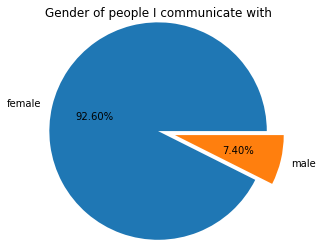

In [47]:
plt.pie(my["count"], labels=my["gender"], autopct="%.2f%%", explode=(0,.2), radius=1.25)
plt.title("Gender of people I communicate with")
plt.show()